# Evaluation examples

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import yaml
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

Detecting 1 CUDA device(s).
2023-11-09 11:04:38,362 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:41] - INFO: cffi mode is CFFI_MODE.ANY
2023-11-09 11:04:38,362 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:218] - INFO: R home found: C:\Program Files\R\R-4.3.1
2023-11-09 11:04:38,382 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\rinterface_lib\embedded.py[line:20] - INFO: Default options to initialize R: rpy2, --quiet, --no-save
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [47]:
experiment_folder = 'clustercausal\experiments\_results\debug_test\ClusterPC_2023-11-08 22-02-27.825701\erdos_renyi_10_nodes_10_edges_3_clusters_exp22-02-32-839'
base_est_graph, cluster_est_graph, cluster_dag = load_experiment_graphs(experiment_folder)

In [48]:
results = yaml.load(open(experiment_folder + '\\results.yaml', 'r'), Loader=yaml.FullLoader)

In [49]:
results

{'base_evaluation_results': {'adj_f1_score': 0.7999999999999999,
  'adj_false_negative': 1,
  'adj_false_positive': 2,
  'adj_precision': 0.75,
  'adj_recall': 0.8571428571428571,
  'adj_true_negative': 36,
  'adj_true_positive': 6,
  'arrow_f1_score': 0.6666666666666666,
  'arrow_f1_score_ce': 0.8333333333333334,
  'arrow_false_negative': 2.0,
  'arrow_false_negative_ce': 1.0,
  'arrow_false_positive': 3.0,
  'arrow_false_positive_ce': 1.0,
  'arrow_precision': 0.625,
  'arrow_precision_ce': 0.8333333333333334,
  'arrow_recall': 0.7142857142857143,
  'arrow_recall_ce': 0.8333333333333334,
  'arrow_true_negative': 90.0,
  'arrow_true_negative_ce': 93.0,
  'arrow_true_positive': 5.0,
  'arrow_true_positive_ce': 5.0,
  'base_shd': 4,
  'sid_lower': None},
 'cluster_evaluation_results': {'adj_f1_score': 0.75,
  'adj_false_negative': 1,
  'adj_false_positive': 3,
  'adj_precision': 0.6666666666666666,
  'adj_recall': 0.8571428571428571,
  'adj_true_negative': 35,
  'adj_true_positive': 6,


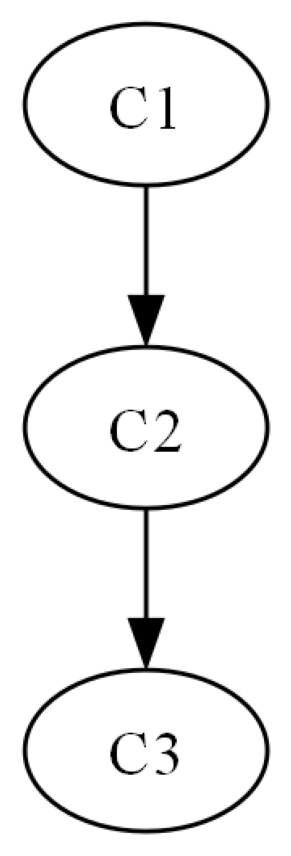

In [28]:
cluster_dag.draw_cluster_graph()

In [29]:
cluster_dag.cluster_mapping

{'C1': ['X2', 'X6', 'X3', 'X8'],
 'C2': ['X7', 'X4', 'X10', 'X1', 'X5'],
 'C3': ['X9']}

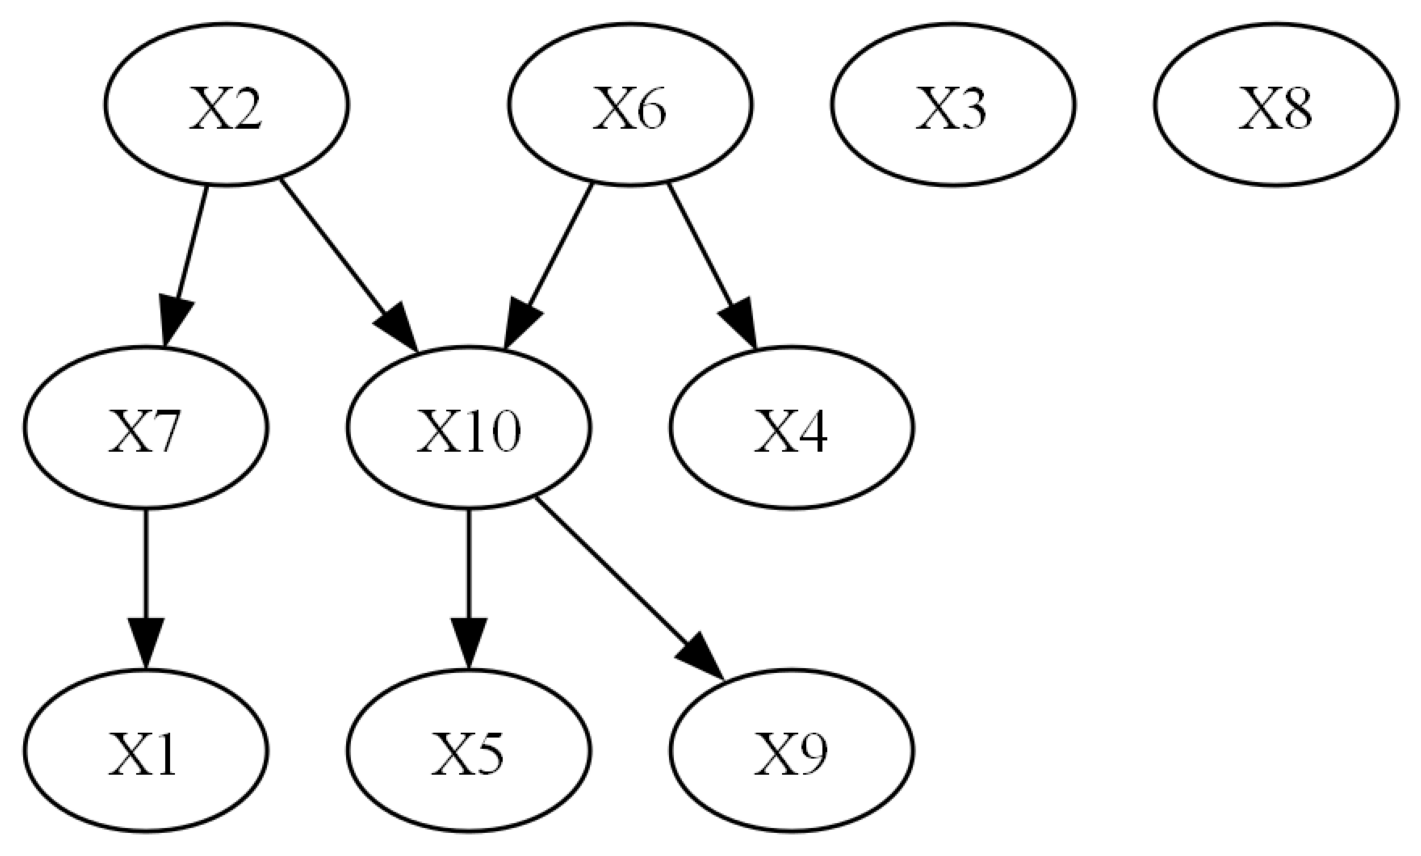

In [30]:
cluster_dag.true_dag.draw_pydot_graph()

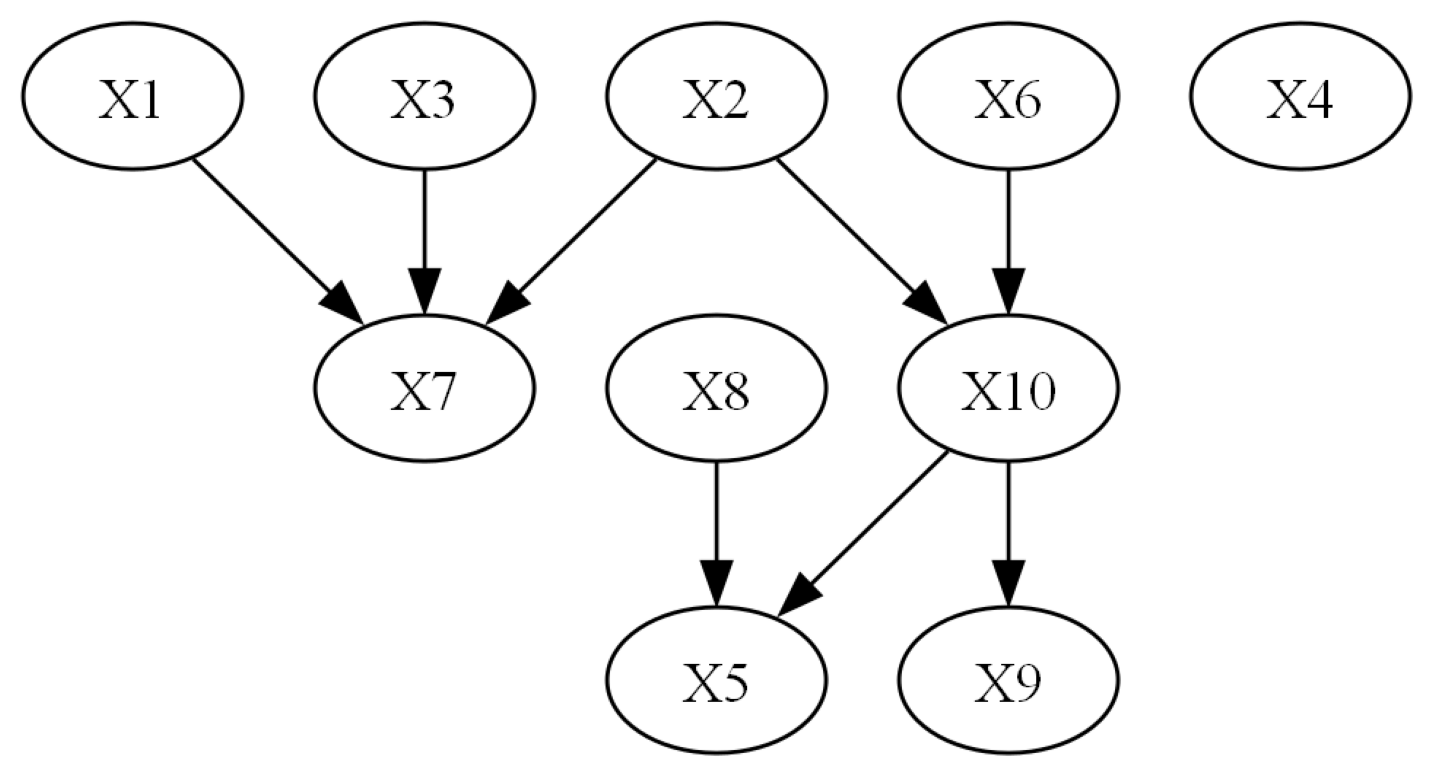

In [31]:
base_est_graph.draw_pydot_graph()

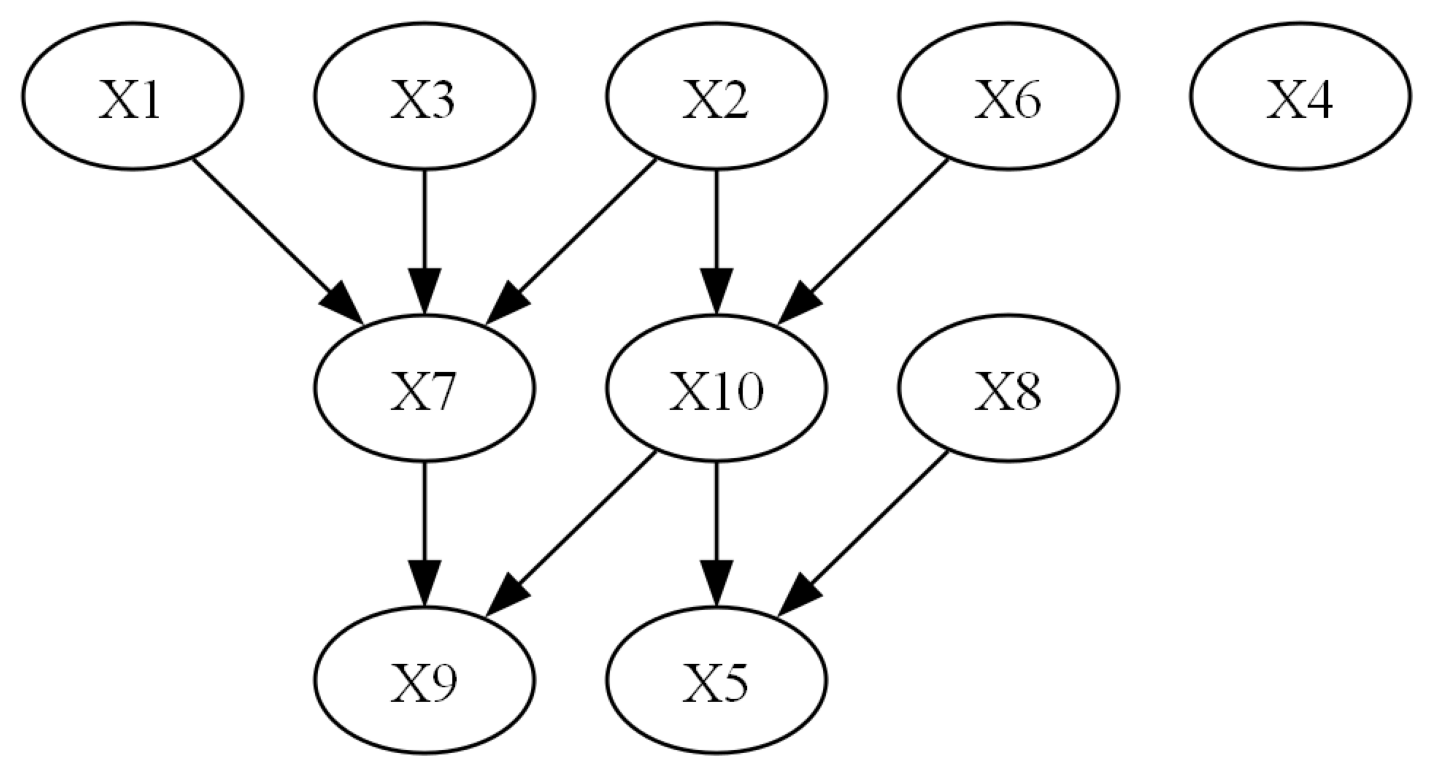

In [32]:
cluster_est_graph.draw_pydot_graph()

In [33]:
import pickle

# Specify the path to your .pkl file
file_path = 'clustercausal\experiments\_results\ClusterPC_2023-11-08 22-02-27.825701\erdos_renyi_10_nodes_10_edges_2_clusters_exp22-02-28-129\cluster_dag.pkl'

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    loaded_data = pickle.load(file)

# Now, 'loaded_data' contains the data from the .pkl file


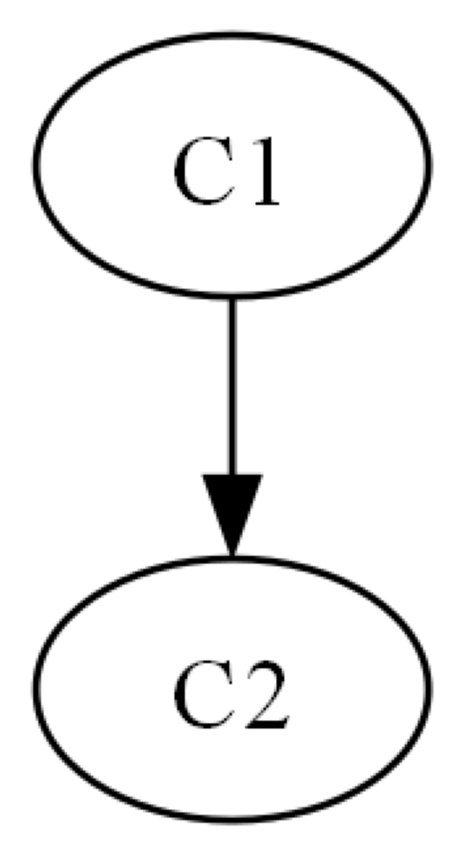

In [34]:
loaded_data.draw_cluster_graph()

In [35]:
%autoreload 2
simulation = Simulator(n_nodes = 35, n_edges = 50, n_clusters = 6, seed = 12343, sample_size = 100)
cluster_dag = simulation.run()

2023-11-09 11:17:16,632 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [36]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X1', 'X16', 'X21', 'X4', 'X7'], 'C2': ['X22', 'X27', 'X10', 'X28', 'X9', 'X15', 'X24', 'X25', 'X31'], 'C3': ['X11', 'X6', 'X17', 'X19', 'X8', 'X35'], 'C4': ['X13', 'X2', 'X3', 'X18'], 'C5': ['X20', 'X29'], 'C6': ['X33', 'X32', 'X34', 'X12', 'X30', 'X5', 'X14', 'X23', 'X26']}
[('C1', 'C3'), ('C1', 'C4'), ('C3', 'C4'), ('C4', 'C6'), ('C1', 'C6'), ('C2', 'C3'), ('C2', 'C4'), ('C3', 'C6'), ('C2', 'C6'), ('C1', 'C5'), ('C3', 'C5')]


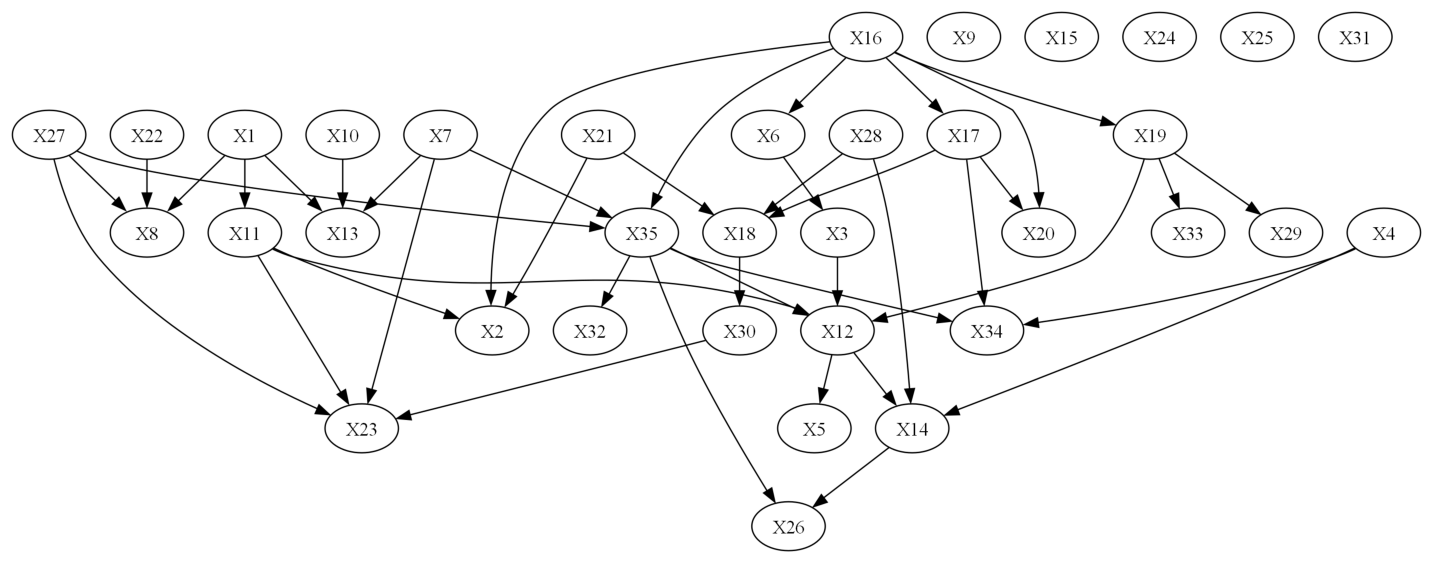

In [37]:
cluster_dag.true_dag.draw_pydot_graph()

In [38]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

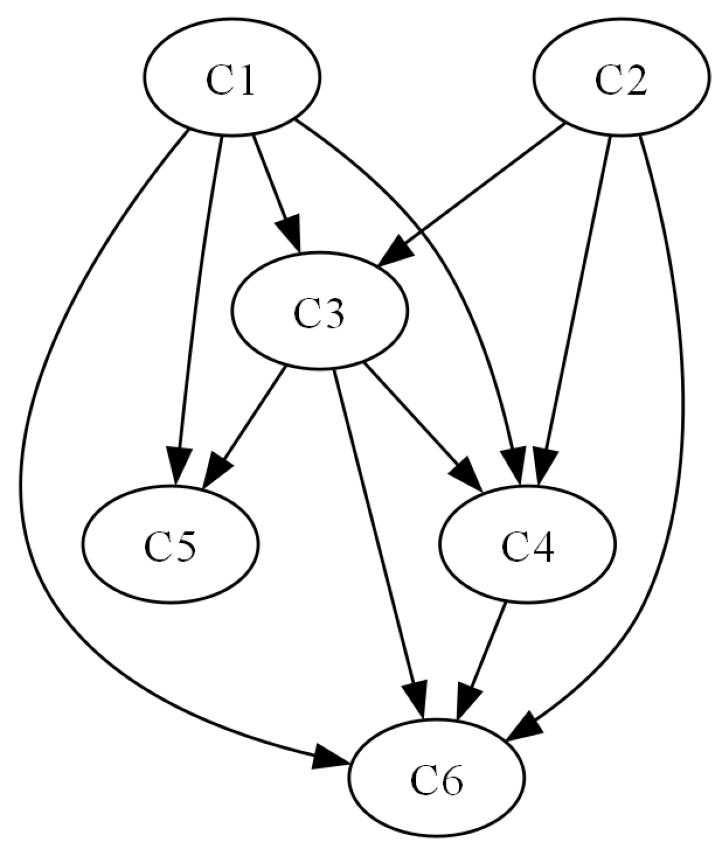

In [39]:
cluster_dag.draw_cluster_graph()

In [40]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
import causallearn
# %load_ext line_profiler
# %lprun -f causallearn.graph.GeneralGraph.remove_edge() est_graph = cluster_pc.run()
# est_graph = cluster_pc.run()

In [41]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
# %load_ext line_profiler
# %lprun -f cluster_pc.into_cluster_phase est_graph = cluster_pc.run()
est_graph = cluster_pc.run()

C6 phase, Depth=4, working on node 33: 100%|██████████| 9/9 [00:00<00:00, 288.02it/s, duration: 0.40sec]


Duration of algorithm was 1.01sec


In [42]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
# %load_ext line_profiler
# %lprun -f cluster_pc.in_cluster_phase est_graph = cluster_pc.run()
est_graph = cluster_pc.run()

C6 phase, Depth=4, working on node 33: 100%|██████████| 9/9 [00:00<00:00, 576.02it/s, duration: 0.40sec]

Duration of algorithm was 1.00sec


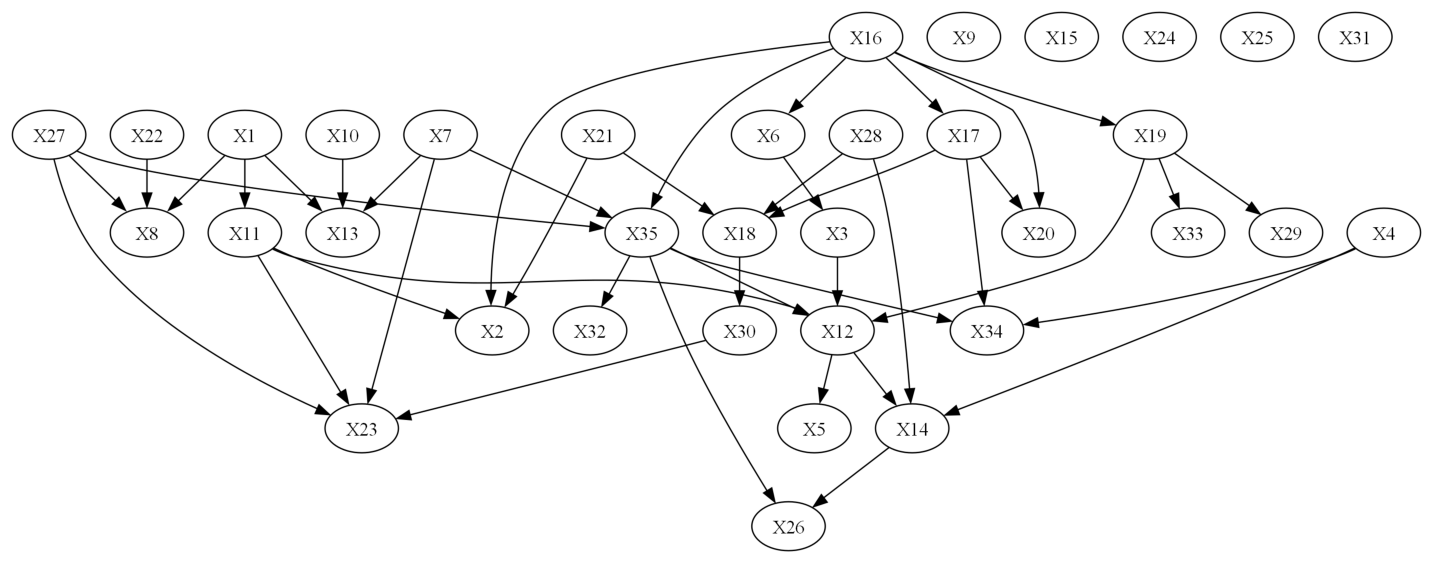

In [43]:
cluster_dag.true_dag.draw_pydot_graph()

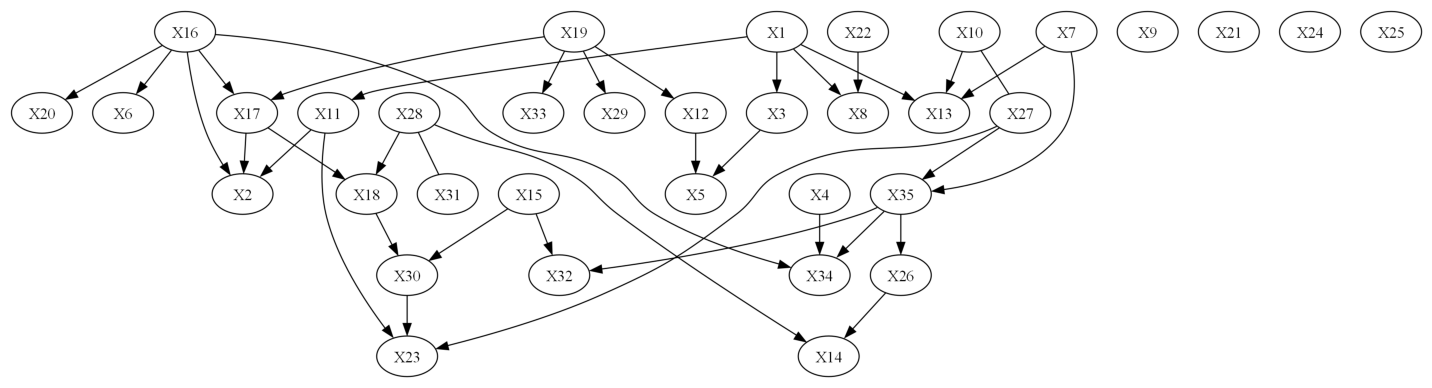

In [44]:
est_graph.draw_pydot_graph()

In [45]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

TypeError: Evaluator.get_causallearn_metrics() missing 1 required positional argument: 'sid'

In [ ]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(cluster_dag.data, alpha = 0.05, verbose=False)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
adjacency_confusion, arrow_confusion, shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Depth=3, working on node 34: 100%|██████████| 35/35 [00:00<00:00, 1207.65it/s]


Adjacency confusion:  {'true_positive': 25, 'false_positive': 8, 'false_negative': 18, 'true_negative': 544, 'precision': 0.7575757575757576, 'recall': 0.5813953488372093}
Arrow confusion:  {'true_positive': 10.0, 'false_positive': 8.0, 'false_negative': 33.0, 'true_negative': 1174.0, 'precision': 0.5555555555555556, 'recall': 0.23255813953488372, 'true_positive_ce': 10.0, 'false_positive_ce': 2.0, 'false_negative_ce': 15.0, 'true_negative_ce': 1198.0, 'precision_ce': 0.8333333333333334, 'recall_ce': 0.4}
SHD:  28


### Low dimensional example

In [ ]:
simulation = Simulator(n_nodes = 5, n_edges = 4, seed = 42)
cluster_dag = simulation.run()

2023-08-16 12:46:38,508 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


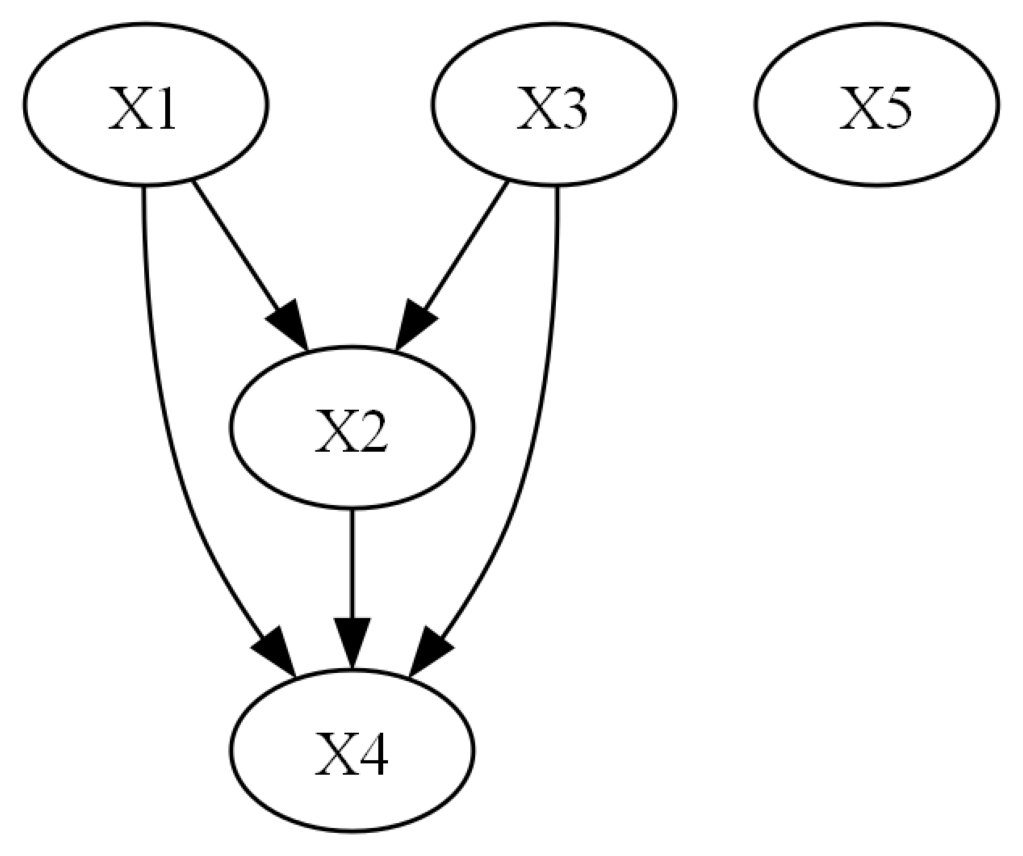

In [ ]:
cluster_dag.true_dag.draw_pydot_graph()

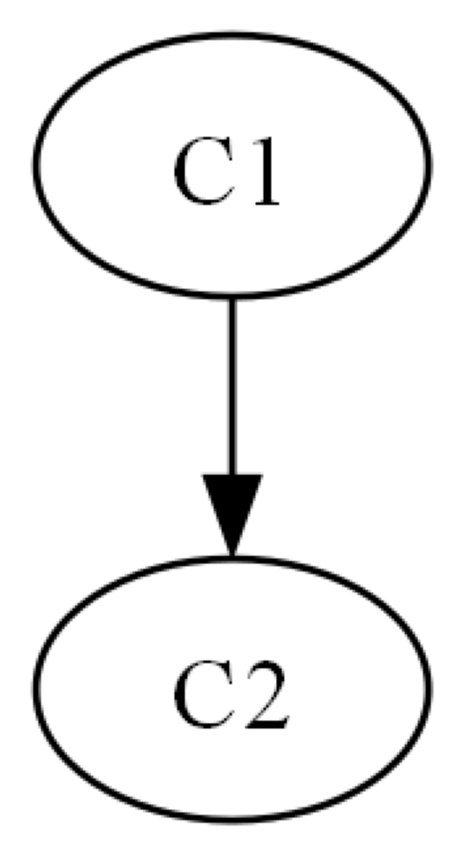

{'C1': ['X1', 'X3'], 'C2': ['X5', 'X2', 'X4']}


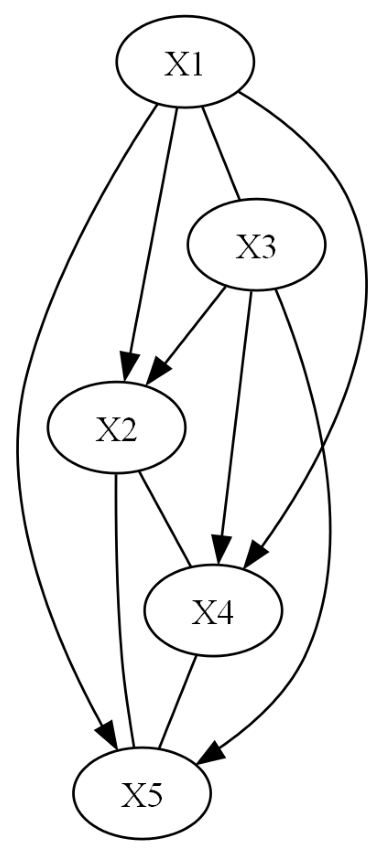

In [ ]:
cluster_dag.draw_cluster_graph()
cluster_dag.cdag_to_mpdag()
print(cluster_dag.cluster_mapping)
cluster_dag.draw_mpdag()

In [ ]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()

In:     C2, Depth=0, working on node 4: 100%|██████████| 3/3 [00:00<00:00, 754.05it/s, duration: 0.02sec] 

Duration of algorithm was 0.05sec


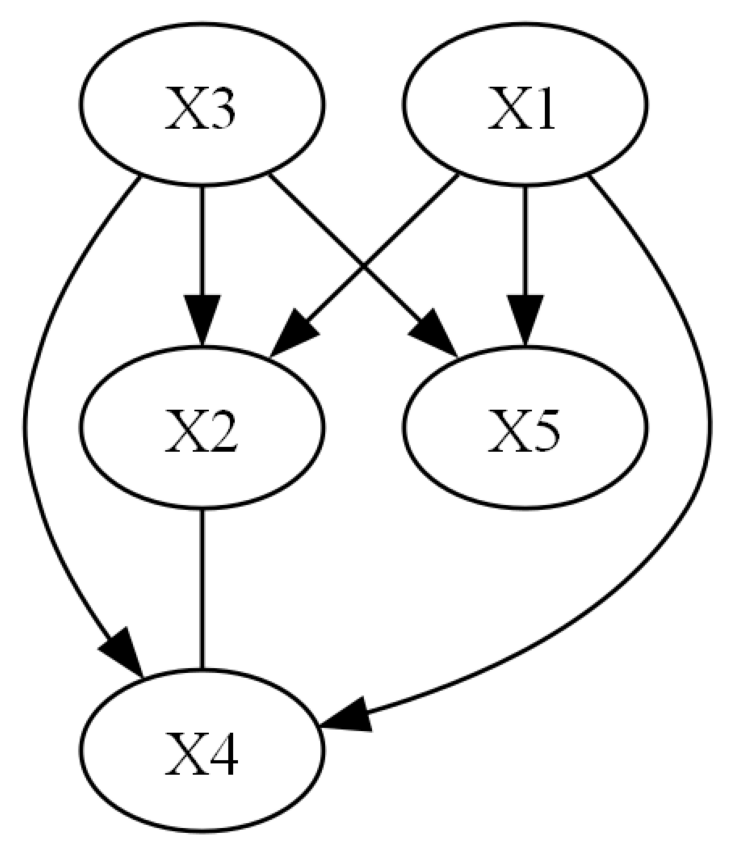

In [ ]:
est_graph.draw_pydot_graph()

In [ ]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 5, 'false_positive': 2, 'false_negative': 0, 'true_negative': 3, 'precision': 0.7142857142857143, 'recall': 1.0}
Arrow confusion:  {'true_positive': 4.0, 'false_positive': 2.0, 'false_negative': 1.0, 'true_negative': 18.0, 'precision': 0.6666666666666666, 'recall': 0.8, 'true_positive_ce': 4.0, 'false_positive_ce': 0.0, 'false_negative_ce': 1.0, 'true_negative_ce': 20.0, 'precision_ce': 1.0, 'recall_ce': 0.8}
SHD:  2


In [ ]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(cluster_dag.data, verbose=False)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
adjacency_confusion, arrow_confusion, shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 626.30it/s] 

Adjacency confusion:  {'true_positive': 5, 'false_positive': 1, 'false_negative': 0, 'true_negative': 4, 'precision': 0.8333333333333334, 'recall': 1.0}
Arrow confusion:  {'true_positive': 4.0, 'false_positive': 0.0, 'false_negative': 1.0, 'true_negative': 20.0, 'precision': 1.0, 'recall': 0.8, 'true_positive_ce': 4.0, 'false_positive_ce': 0.0, 'false_negative_ce': 1.0, 'true_negative_ce': 20.0, 'precision_ce': 1.0, 'recall_ce': 0.8}
SHD:  1


In [ ]:
est_graph.G.graph

array([[ 0, -1,  0, -1, -1],
       [ 1,  0,  1, -1,  0],
       [ 0, -1,  0, -1, -1],
       [ 1, -1,  1,  0,  0],
       [ 1,  0,  1,  0,  0]])